# Multilevel Bayesian Correlations

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sb
import pystan

%matplotlib inline
sb.set()

In [2]:
'''
1) Pearson correlation + stan code + fit
- ensure data is normalized? w/ bayesian fit needs to be zscored?
2) Spearman (mu is always 0.5)
3) Multilevel pearson w/ diagram
4) Multilevel spearman
5) Robust correlations w/ t distribution (should probs only use w/ pearson?)
'''

'\n1) Pearson correlation + stan code + fit\n- ensure data is normalized? w/ bayesian fit needs to be zscored?\n2) Spearman (mu is always 0.5)\n3) Multilevel pearson w/ diagram\n4) Multilevel spearman\n5) Robust correlations w/ t distribution (should probs only use w/ pearson?)\n'

The Pearson correlation coefficient ($\rho$) is a measure of how correlated two variables are (e.g. $X_1$ and $X_2$), and is the ratio of the true covariance of the two variables to their expected covariance if they were perfectly correlated:

$$
\rho_{X_1,X_2} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}
$$

where
* $\text{cov}(X_1, X_2)$ is the covariance between $X_1$ and $X_2$
* $\sigma_{X_1}$ is the standard deviation of $X_1$, and 
* $\sigma_{X_2}$ is the standard deviation of $X_2$

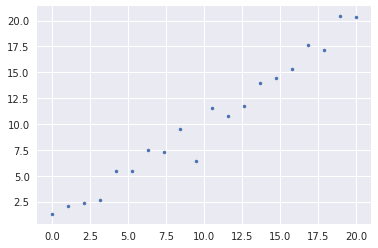

In [3]:
# Create some dummy data with known correlation
X = np.zeros((20,2))
X[:,0] = np.linspace(0, 20, 20)
X[:,1] = X[:,0] + np.random.randn(20)

# Plot dummy data
plt.figure()
plt.plot(X[:,0], X[:,1], '.')
plt.show()

Description of how to build bayesian model of a correlation

In [4]:
#STAN code string for the basic pearson correlation model

In [5]:
# Data for Stan
data = {'N' : X.shape[0], #number of datapoints
        'X' : X} #the data

# Fit the model
model = pystan.StanModel(file='PearsonCorrelation.stan')
fit = model.sampling(data=data, iter=200, chains=5, n_jobs=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e2abdd52e6a64f20ad4ce1185e7cab48 NOW.
/home/redish/haszx010/.local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
# Print the results of the fit
print(fit)

Inference for Stan model: anon_model_e2abdd52e6a64f20ad4ce1185e7cab48.
5 chains, each with iter=200; warmup=100; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]   10.15    0.16   1.42   7.45    9.2  10.12  10.99  12.88     74   1.04
mu[1]   10.34    0.17    1.4   7.65   9.43  10.31   11.1  13.09     72   1.04
sig[0]   6.58    0.09   1.24   4.82   5.71   6.42   7.21   9.25    193    1.0
sig[1]   6.48    0.09   1.21   4.71    5.6   6.36   7.07   9.22    192   1.01
rho      0.98  5.8e-4 9.3e-3   0.96   0.98   0.98   0.99   0.99    260    1.0
T[0,0]  44.81    1.46  18.67  23.19  32.55  41.19  51.93  85.48    164   1.01
T[1,0]  43.34    1.42  18.14  22.31  30.87  39.84  50.25  83.26    163   1.01
T[0,1]  43.34    1.42  18.14  22.31  30.87  39.84  50.25  83.26    163   1.01
T[1,1]  43.46    1.39  17.86  22.14  31.32  40.43  49.98  85.06    165   1.01
lp__   -59.97    0.14   1.58 -64.12

In [7]:
# Get the MCMC samples (draws from the posterior distribution)
samples = fit.extract()

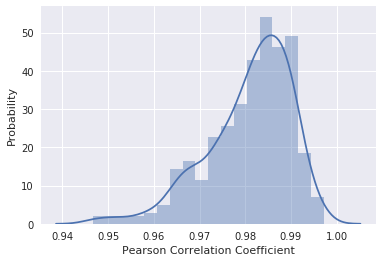

In [8]:
# Plot the posterior distribution for the correlation coefficient
plt.figure()
sb.distplot(samples['rho'])
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Probability')
plt.show()